In [1]:
from google.colab import drive
from bs4 import BeautifulSoup
import pickle
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
import numpy as np
import pandas as pd

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
!pip install langdetect
!pip install translate
from translate import Translator
from langdetect import detect

In [3]:
drive.mount('/content/drive') 

Mounted at /content/drive


In [4]:
import pandas as pd
train_data = pd.read_csv("/content/drive/My Drive/IR/Project/Job_Posting_dataset.csv")
test_data = pd.read_csv("/content/drive/My Drive/IR/Project/testing_dataset.csv")
test_data

,LinkedIn Resume,Job Profiles
0,Shyvee Shi\n(She/Her)\n3rd degree connection\n...,"['Product Manager','Business Analyst','UX Desi..."
1,Elisa Bellagamba\n\nAbout\nHigh-impact product...,"['Product Manager','Business Analyst','Marketi..."
2,Joni (Rafalski) Hoadley (She/Her)\n\nAbout\nI’...,"['Product Manager','UX Designer','Business Ana..."
3,Shane Connelly\n\nAbout\nI lead the product ma...,"['Product Manager','Software Developer,'Machin..."
4,Dana Tom\n(She/Her)\n\nAbout\nI’m a product ma...,"['Product Manager','Marketing Analyst','Machin..."
...,...,...
367,Johanna P.\n\nAbout\nExperienced Bilingual Rep...,"['Sales Analyst','Marketing Analyst,''Business..."
368,Rachel Sedlacek\n\nAbout\nAnalyst with 12 year...,"['Sales Analyst','Marketing Analyst,''Business..."
369,Deirdre Derby\n\nAbout\n[]\n\nLocation\nMinnea...,"['Sales Analyst','Marketing Analyst,''Business..."
370,Ryan Mitchell\n\nAbout\nSr. Sales Analyst for ...,"['Sales Analyst','Marketing Analyst,''Business..."


In [5]:
#@title Removing all the rows that contain description in other languages than English
for index, row in train_data.iterrows():
    try:
        lang = detect(row['Job_Description'])
        if lang != 'en':
            train_data.drop(index, inplace=True)
    except:
        # if an error occurs, assume the language is not English and drop the row
        train_data.drop(index, inplace=True)
train_data.reset_index(inplace=True)
train_data

,index,Job ID,Job Title,Company,Job_Description,Job Profile
0,1,3489403427,Software Engineer,LinkedIn,"The ideal candidate will help build, maintain,...",Software Developer
1,2,3490979195,Software Engineer,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",Software Developer
2,3,3507663809,Junior Software Developer (Web/Front-End),Samsung Brasil,Position Summary\n\n\n\n\nDevelop a differenti...,Software Developer
3,4,3497871312,Software Engineer,Oracle,Want to come join the Oracle Health Data & Ana...,Software Developer
4,6,3497654432,Software Engineer,Illuma,We are looking for a highly motivated Software...,Software Developer
...,...,...,...,...,...,...
909,985,3496041048,Marketing Analyst,TI Fluid Systems,Description\n\nDescription:\n\nPosition Summar...,Marketing Analyst
910,986,3496037782,Marketing Analyst,TI Fluid Systems,Description\n\nDescription:\n\nPosition Summar...,Marketing Analyst
911,987,3485523798,Marketing Analyst,Hose Master LLC,POSITION SUMMARY\n\nThe Marketing Analyst is r...,Marketing Analyst
912,988,3488196177,Senior Marketing Analyst,Maxeon Solar Technologies,Maxeon Solar Technologies is a global leader i...,Marketing Analyst


In [6]:
#@title Removing all the rows that contain description in other languages than English
for index, row in test_data.iterrows():
    try:
        lang = detect(row['LinkedIn Resume'])
        if lang != 'en':
            test_data.drop(index, inplace=True)
    except:
        # if an error occurs, assume the language is not English and drop the row
        test_data.drop(index, inplace=True)
test_data.reset_index(inplace=True)
test_data

,index,LinkedIn Resume,Job Profiles
0,0,Shyvee Shi\n(She/Her)\n3rd degree connection\n...,"['Product Manager','Business Analyst','UX Desi..."
1,1,Elisa Bellagamba\n\nAbout\nHigh-impact product...,"['Product Manager','Business Analyst','Marketi..."
2,2,Joni (Rafalski) Hoadley (She/Her)\n\nAbout\nI’...,"['Product Manager','UX Designer','Business Ana..."
3,3,Shane Connelly\n\nAbout\nI lead the product ma...,"['Product Manager','Software Developer,'Machin..."
4,4,Dana Tom\n(She/Her)\n\nAbout\nI’m a product ma...,"['Product Manager','Marketing Analyst','Machin..."
...,...,...,...
367,367,Johanna P.\n\nAbout\nExperienced Bilingual Rep...,"['Sales Analyst','Marketing Analyst,''Business..."
368,368,Rachel Sedlacek\n\nAbout\nAnalyst with 12 year...,"['Sales Analyst','Marketing Analyst,''Business..."
369,369,Deirdre Derby\n\nAbout\n[]\n\nLocation\nMinnea...,"['Sales Analyst','Marketing Analyst,''Business..."
370,370,Ryan Mitchell\n\nAbout\nSr. Sales Analyst for ...,"['Sales Analyst','Marketing Analyst,''Business..."


In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Define stop words
stop_words = set(stopwords.words('english'))

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()
def preprocess_text(text):
    text = text.lower()
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    text = ' '.join(words)
    return text

# Apply preprocess_text() function to job description column
train_data['Job_Description'] = train_data['Job_Description'].apply(preprocess_text)
test_data['LinkedIn Resume'] = test_data['LinkedIn Resume'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


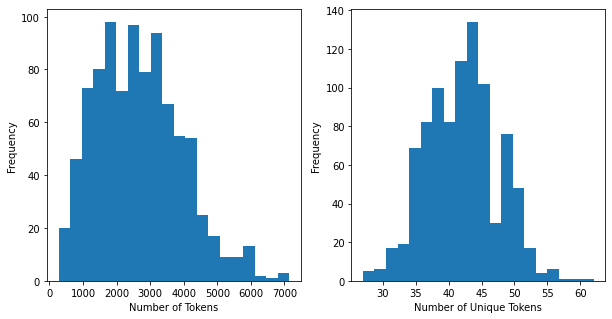

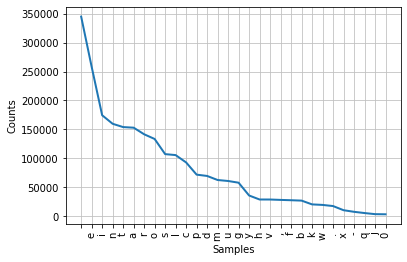

<Axes: xlabel='Samples', ylabel='Counts'>

In [10]:
import matplotlib.pyplot as plt

train_data['num_tokens'] = train_data['Job_Description'].apply(len)

# Count the number of unique tokens
train_data['num_unique_tokens'] = train_data['Job_Description'].apply(lambda x: len(set(x)))

# Plot the distribution of number of tokens and number of unique tokens
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(train_data['num_tokens'], bins=20)
ax[0].set_xlabel('Number of Tokens')
ax[0].set_ylabel('Frequency')
ax[1].hist(train_data['num_unique_tokens'], bins=20)
ax[1].set_xlabel('Number of Unique Tokens')
ax[1].set_ylabel('Frequency')
plt.show()

# Plot the frequency distribution of tokens
all_tokens = [word for tokens in train_data['Job_Description'] for word in tokens]
freq_dist = nltk.FreqDist(all_tokens)
freq_dist.plot(30, cumulative=False)

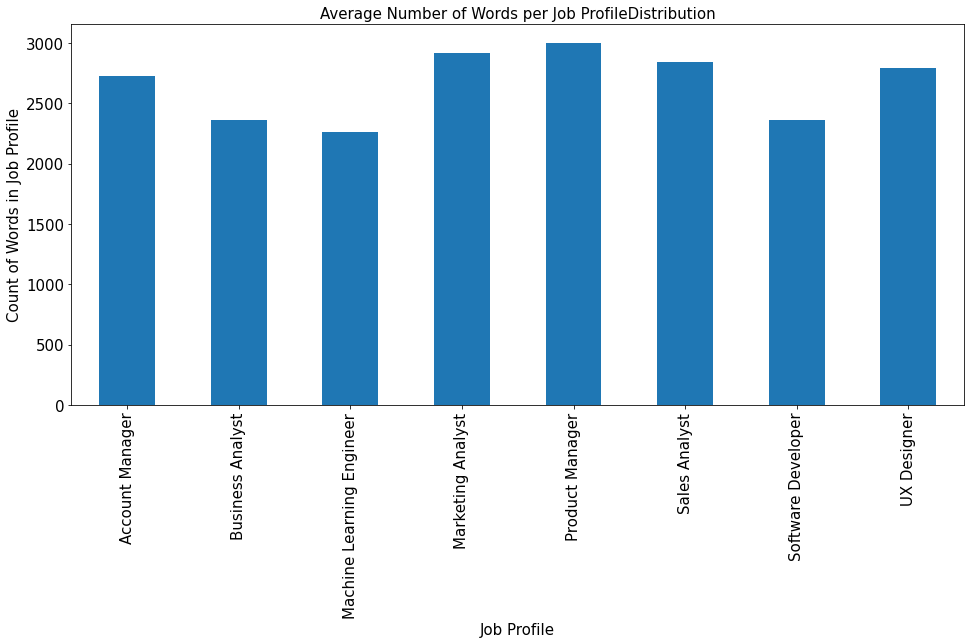

In [33]:
word_avg = train_data.groupby('Job Profile')['num_tokens'].mean().plot(kind='bar', figsize=(16,7))
plt.xlabel('Job Profile', fontsize=15)
plt.ylabel('Count of Words in Job Profile', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Average Number of Words per Job ProfileDistribution', fontsize=15)
plt.show()

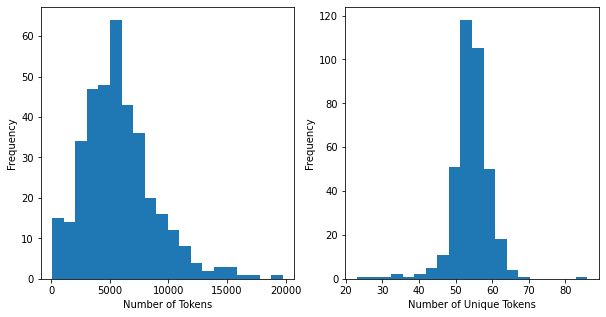

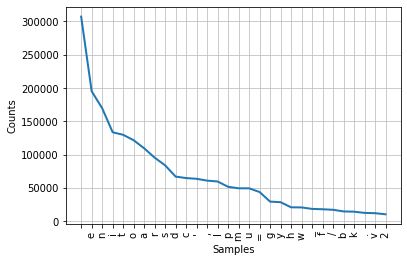

<Axes: xlabel='Samples', ylabel='Counts'>

In [25]:
import matplotlib.pyplot as plt

test_data['num_tokens'] = test_data['LinkedIn Resume'].apply(len)

# Count the number of unique tokens
test_data['num_unique_tokens'] = test_data['LinkedIn Resume'].apply(lambda x: len(set(x)))

# Plot the distribution of number of tokens and number of unique tokens
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(test_data['num_tokens'], bins=20)
ax[0].set_xlabel('Number of Tokens')
ax[0].set_ylabel('Frequency')
ax[1].hist(test_data['num_unique_tokens'], bins=20)
ax[1].set_xlabel('Number of Unique Tokens')
ax[1].set_ylabel('Frequency')
plt.show()

# Plot the frequency distribution of tokens
all_tokens = [word for tokens in test_data['LinkedIn Resume'] for word in tokens]
freq_dist = nltk.FreqDist(all_tokens)
freq_dist.plot(30, cumulative=False)

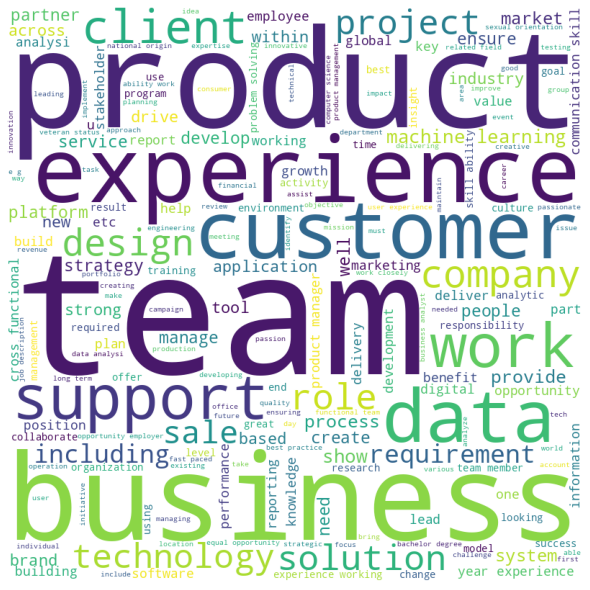

In [28]:
from wordcloud import WordCloud
text = ' '.join(train_data['Job_Description'])
# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)
# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

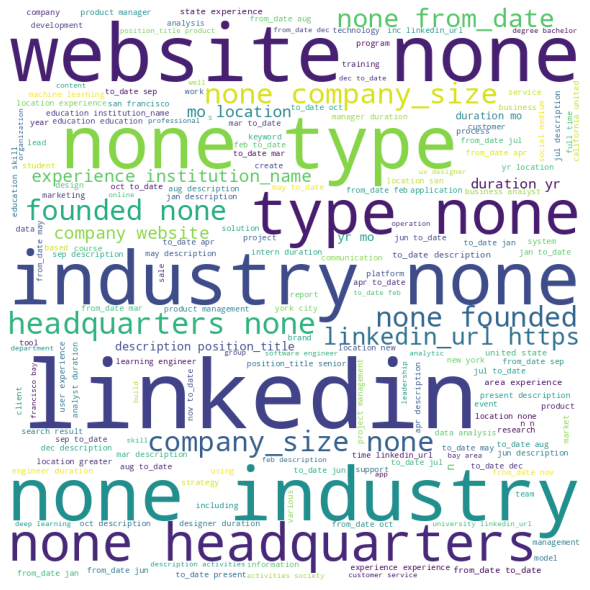

In [29]:
from wordcloud import WordCloud
text = ' '.join(test_data['LinkedIn Resume'])
# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)
# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Machine Learning Engineer    145
Product Manager              143
Marketing Analyst            138
UX Designer                  106
Account Manager              100
Sales Analyst                 99
Business Analyst              98
Software Developer            85
Name: Job Profile, dtype: int64


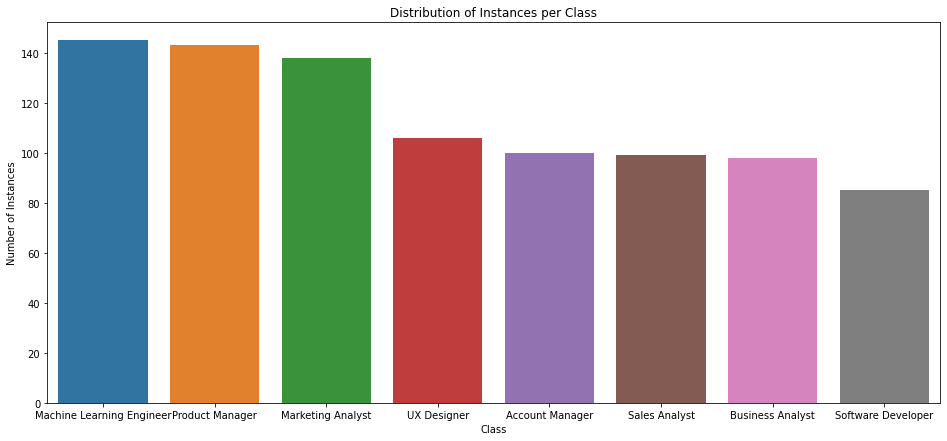

In [24]:
import seaborn as sns
# Count the number of instances per class
class_counts = train_data['Job Profile'].value_counts()
# Plot the distribution of instances per class
plt.figure(figsize=(16, 7))
sns.barplot(x=class_counts.index, y=class_counts.values)
#fig, ax = plt.subplots()
plt.title('Distribution of Instances per Class')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#ax.figure
print(train_data['Job Profile'].value_counts())
plt.show()